<a href="https://colab.research.google.com/github/mjaffry/ExperimentalRepo/blob/master/SQL_to_PANDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# df.to_csv(...)  # csv file
# df.to_hdf(...)  # HDF5 file
# df.to_pickle(...)  # serialized object
# df.to_sql(...)  # to SQL database
# df.to_excel(...)  # to Excel sheet
# df.to_json(...)  # to JSON string
# df.to_html(...)  # render as HTML table
# df.to_feather(...)  # binary feather-format
# df.to_latex(...)  # tabular environment table
# df.to_stata(...)  # Stata binary data files
# df.to_msgpack(...)	# msgpack (serialize) object
# df.to_gbq(...)  # to a Google BigQuery table.
# df.to_string(...)  # console-friendly tabular output.
# df.to_clipboard(...) # clipboard that can be pasted into Excel

https://raw.githubusercontent.com/mjaffry/PythonPtojects/mjaffry-airport/airport-frequencies.csv

https://raw.githubusercontent.com/mjaffry/PythonPtojects/mjaffry-airport/airports.csv

https://raw.githubusercontent.com/mjaffry/PythonPtojects/mjaffry-airport/countries.csv

https://raw.githubusercontent.com/mjaffry/PythonPtojects/mjaffry-airport/navaids.csv

https://raw.githubusercontent.com/mjaffry/PythonPtojects/mjaffry-airport/regions.csv

https://raw.githubusercontent.com/mjaffry/PythonPtojects/mjaffry-airport/runways.csv

In [ ]:
import pandas as pd

airports = pd.read_csv('https://raw.githubusercontent.com/mjaffry/PythonPtojects/mjaffry-airport/airports.csv')
airport_freq = pd.read_csv('https://raw.githubusercontent.com/mjaffry/PythonPtojects/mjaffry-airport/airport-frequencies.csv')
runways = pd.read_csv('https://raw.githubusercontent.com/mjaffry/PythonPtojects/mjaffry-airport/runways.csv')
by_country= pd.read_csv("https://raw.githubusercontent.com/mjaffry/PythonPtojects/mjaffry-airport/countries.csv")
navaids=pd.read_csv('https://raw.githubusercontent.com/mjaffry/PythonPtojects/mjaffry-airport/navaids.csv')


|                      SQL                     |                 Pandas                |
|:--------------------------------------------:|:-------------------------------------:|
| select * from airports                       | airports                              |
| select * from airports limit 3               | airports.head(3)                      |
| select id from airports where ident = 'KLAX' | airports[airports.ident == 'KLAX'].id |
| select distinct type from airport            | airports.type.unique()                |

In [ ]:
airports

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
0,6523,00A,heliport,Total Rf Heliport,40.070801,-74.933601,11.0,NaN,US,US-PA,Bensalem,no,00A,NaN,00A,NaN,NaN,NaN
1,323361,00AA,small_airport,Aero B Ranch Airport,38.704022,-101.473911,3435.0,NaN,US,US-KS,Leoti,no,00AA,NaN,00AA,NaN,NaN,NaN
2,6524,00AK,small_airport,Lowell Field,59.949200,-151.695999,450.0,NaN,US,US-AK,Anchor Point,no,00AK,NaN,00AK,NaN,NaN,NaN
3,6525,00AL,small_airport,Epps Airpark,34.864799,-86.770302,820.0,NaN,US,US-AL,Harvest,no,00AL,NaN,00AL,NaN,NaN,NaN
4,6526,00AR,closed,Newport Hospital & Clinic Heliport,35.608700,-91.254898,237.0,NaN,US,US-AR,Newport,no,NaN,NaN,NaN,NaN,NaN,00AR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57055,317861,ZYYK,medium_airport,Yingkou Lanqi Airport,40.542524,122.358600,0.0,AS,CN,CN-21,Yingkou,yes,ZYYK,YKH,NaN,NaN,https://en.wikipedia.org/wiki/Yingkou_Lanqi_Ai...,NaN
57056,32753,ZYYY,medium_airport,Shenyang Dongta Airport,41.784401,123.496002,NaN,AS,CN,CN-21,Shenyang,no,ZYYY,NaN,NaN,NaN,NaN,NaN
57057,46378,ZZ-0001,heliport,Sealand Helipad,51.894444,1.482500,40.0,EU,GB,GB-ENG,Sealand,no,NaN,NaN,NaN,http://www.sealandgov.org/,https://en.wikipedia.org/wiki/Principality_of_...,Roughs Tower Helipad
57058,307326,ZZ-0002,small_airport,Glorioso Islands Airstrip,-11.584278,47.296389,11.0,AF,TF,TF-U-A,Grande Glorieuse,no,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
airports[airports.ident == 'KLAX'].id

28940    3632
Name: id, dtype: int64

select * from airports where iso_region = 'US-CA' and type = 'seaplane_base'

	airports[(airports.iso_region == 'US-CA') & (airports.type == 'seaplane_base')]

In [ ]:
airports[(airports.iso_region == 'US-CA') & (airports.type == 'seaplane_base')]

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
984,7436,0O0,seaplane_base,San Luis Reservoir Seaplane Base,37.058300,-121.125999,544.0,NaN,US,US-CA,Los Banos,no,0O0,NaN,0O0,NaN,NaN,NaN
2504,8877,22CA,seaplane_base,Commodore Center Seaplane Base,37.879902,-122.514000,NaN,NaN,US,US-CA,Sausalito,no,22CA,NaN,22CA,NaN,NaN,NaN
6277,12298,5CA9,seaplane_base,Konocti - Clear Lake Seaplane Base,38.977699,-122.718002,1326.0,NaN,US,US-CA,Kelseyville,no,5CA9,NaN,5CA9,NaN,NaN,NaN
13404,16514,C39,seaplane_base,Folsom Lake Seaplane Base,38.707199,-121.133003,466.0,NaN,US,US-CA,Folsom,no,C39,NaN,C39,NaN,NaN,NaN
15746,16830,CN20,seaplane_base,Ferndale Resort Seaplane Base,39.002998,-122.796997,1326.0,NaN,US,US-CA,Kelseyville,no,CN20,NaN,CN20,NaN,NaN,NaN
18137,17157,E20,seaplane_base,Lake Berryessa Seaplane Base,38.591599,-122.259003,440.0,NaN,US,US-CA,Napa,no,E20,NaN,E20,NaN,NaN,NaN
23652,17613,H77,seaplane_base,Bridge Bay Resort Seaplane Base,40.757599,-122.322998,1065.0,NaN,US,US-CA,Redding,no,H77,NaN,H77,NaN,NaN,NaN
31678,21444,L11,seaplane_base,Pebbly Beach Seaplane Base,33.338402,-118.311996,NaN,NaN,US,US-CA,Avalon,no,KL11,NaN,L11,NaN,NaN,NaN
38473,23479,O06,seaplane_base,Lake Oroville Landing Area Seaplane Base,39.566601,-121.468002,900.0,NaN,US,US-CA,Oroville,no,O06,NaN,O06,NaN,NaN,NaN
42185,24384,S74,seaplane_base,Lost Isle Seaplane Base,38.004101,-121.457001,NaN,NaN,US,US-CA,Stockton,no,S74,NaN,S74,NaN,NaN,NaN


Select * from airport_freq where airport_ident = 'KLAX' order by type

airport_freq[airport_freq.airport_ident == 'KLAX'].sort_values('type')

select * from airport_freq where airport_ident = 'KLAX' order by type desc	

airport_freq[airport_freq.airport_ident == 'KLAX'].sort_values('type', ascending=False)

In [ ]:
airport_freq[airport_freq.airport_ident == 'KLAX'].sort_values('type')

,id,airport_ref,airport_ident,type,description,frequency_mhz
11949,60767,3632,KLAX,APP,SOCAL APP,36.07
11950,60766,3632,KLAX,APP,SOCAL APP,124.30
11951,60768,3632,KLAX,ATIS,ATIS,133.80
11952,60769,3632,KLAX,CLD,CLNC DEL,121.40
11953,60770,3632,KLAX,DEP,SOCAL DEP,124.30
11954,60771,3632,KLAX,GND,GND,121.65
11955,60772,3632,KLAX,MISC,CG,34.50
11956,60773,3632,KLAX,MISC,CG,898.40
11957,60774,3632,KLAX,OPS,AF,37.22
11958,60775,3632,KLAX,TWR,TWR,119.80


In [ ]:
airport_freq[airport_freq.airport_ident == 'KLAX'].sort_values('type', ascending=False)

,id,airport_ref,airport_ident,type,description,frequency_mhz
11959,60776,3632,KLAX,UNIC,UNICOM,122.95
11958,60775,3632,KLAX,TWR,TWR,119.80
11957,60774,3632,KLAX,OPS,AF,37.22
11955,60772,3632,KLAX,MISC,CG,34.50
11956,60773,3632,KLAX,MISC,CG,898.40
11954,60771,3632,KLAX,GND,GND,121.65
11953,60770,3632,KLAX,DEP,SOCAL DEP,124.30
11952,60769,3632,KLAX,CLD,CLNC DEL,121.40
11951,60768,3632,KLAX,ATIS,ATIS,133.80
11949,60767,3632,KLAX,APP,SOCAL APP,36.07


select * from airports where type in ('heliport', 'balloonport')

airports[airports.type.isin(['heliport', 'balloonport'])]

In [ ]:
airports[airports.type.isin(['heliport', 'balloonport'])]

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
0,6523,00A,heliport,Total Rf Heliport,40.070801,-74.933601,11.0,NaN,US,US-PA,Bensalem,no,00A,NaN,00A,NaN,NaN,NaN
9,322658,00CN,heliport,Kitchen Creek Helibase Heliport,32.727374,-116.459742,3350.0,NaN,US,US-CA,Pine Valley,no,00CN,NaN,00CN,NaN,NaN,NaN
12,6532,00FD,heliport,Ringhaver Heliport,28.846600,-82.345398,25.0,NaN,US,US-FL,Riverview,no,00FD,NaN,00FD,NaN,NaN,NaN
15,6535,00GE,heliport,Caffrey Heliport,33.884201,-84.733902,957.0,NaN,US,US-GA,Hiram,no,00GE,NaN,00GE,NaN,NaN,NaN
16,6536,00HI,heliport,Kaupulehu Heliport,19.832715,-155.980233,43.0,NaN,US,US-HI,Kailua-Kona,no,00HI,NaN,00HI,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56674,312611,ZA-0117,heliport,Pumba Helipad,-33.387799,26.410595,NaN,AF,ZA,ZA-EC,Nelson Mandela Bay,no,NaN,NaN,NaN,http://www.pumbagamereserve.co.za/amenities,NaN,NaN
56676,312624,ZA-0119,heliport,Cape Town Heliport,-33.901018,18.425936,NaN,AF,ZA,ZA-WC,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN
56697,318475,ZA-0140,heliport,Kuruman Hospital Heliport,-27.459904,23.443762,NaN,AF,ZA,ZA-NC,Kuruman,no,NaN,NaN,NaN,NaN,NaN,NaN
56795,301278,ZIZ,heliport,Zamzama Heliport,26.710944,67.667250,128.0,AS,PK,PK-SD,Zamzama Gas Field,no,NaN,ZIZ,NaN,NaN,NaN,NaN


select * from airports where type not in ('heliport', 'balloonport')	

airports[~airports.type.isin(['heliport', 'balloonport'])]



---



IN… NOT IN
We know how to filter on a value, but what about a list of values — IN condition? In pandas, .isin() operator works the same way. To negate any condition, use ~.


In [ ]:
[airports.type.isin(['heliport', 'balloonport'])]

[0         True
 1        False
 2        False
 3        False
 4        False
          ...  
 57055    False
 57056    False
 57057     True
 57058    False
 57059    False
 Name: type, Length: 57060, dtype: bool]


**GROUPBY** 

iso_country, type, count(*) from airports group by iso_country, type order by iso_country, type

	airports.groupby(['iso_country', 'type']).size()

In [ ]:
abc=airports.groupby(['iso_country', 'type']).size()
abc.to_csv("Ali.csv")



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


select iso_country, type, count(*) from airports group by iso_country, type order by iso_country, count(*) desc


airports.groupby(['iso_country', 'type']).size().to_frame('size').reset_index().sort_values(['iso_country', 'size'], ascending=[True, False])

In [ ]:
airports.groupby(['iso_country', 'type']).size().to_frame('size').reset_index().sort_values(['iso_country', 'size'], ascending=[True, False])

,iso_country,type,size
0,AD,heliport,2
2,AE,heliport,21
6,AE,small_airport,16
4,AE,medium_airport,7
3,AE,large_airport,4
...,...,...,...
841,ZM,large_airport,1
847,ZW,small_airport,128
846,ZW,medium_airport,8
844,ZW,closed,2


select type, count(*) from airports where iso_country = 'US' group by type having count(*) > 1000 order by count(*) desc	


airports[airports.iso_country == 'US'].groupby('type').filter(lambda g: len(g) > 1000).groupby('type').size().sort_values(ascending=False)

In [ ]:
airports[airports.iso_country == 'US'].groupby('type').filter(lambda g: len(g) > 1000).groupby('type').size().sort_values(ascending=False)

type
small_airport    13565
heliport          6312
closed            1922
dtype: int64

select iso_country from by_country order by size desc limit 10

In [ ]:
by_country=airports.groupby(['iso_country', 'type']).size().to_frame('size').reset_index().sort_values(['iso_country', 'size'], ascending=[True, False])
by_country.nlargest(10, columns='size')

,iso_country,type,size
795,US,small_airport,13565
791,US,heliport,6312
103,BR,small_airport,3331
790,US,closed,1922
48,AU,small_airport,1559
427,KR,heliport,1257
100,BR,heliport,1146
131,CA,small_airport,1005
540,MX,small_airport,955
278,GB,small_airport,792


In [ ]:
#select max(length_ft), min(length_ft), avg(length_ft), median(length_ft) from runways
runways.agg({'length_ft': ['min', 'max', 'mean', 'median']})


,length_ft
min,0.00000
max,120000.00000
mean,3261.49616
median,2743.00000


In [ ]:
runways.agg({'length_ft': ['min', 'max', 'mean', 'median']}).T

,min,max,mean,median
length_ft,0.0,120000.0,3261.49616,2743.0


JOIN

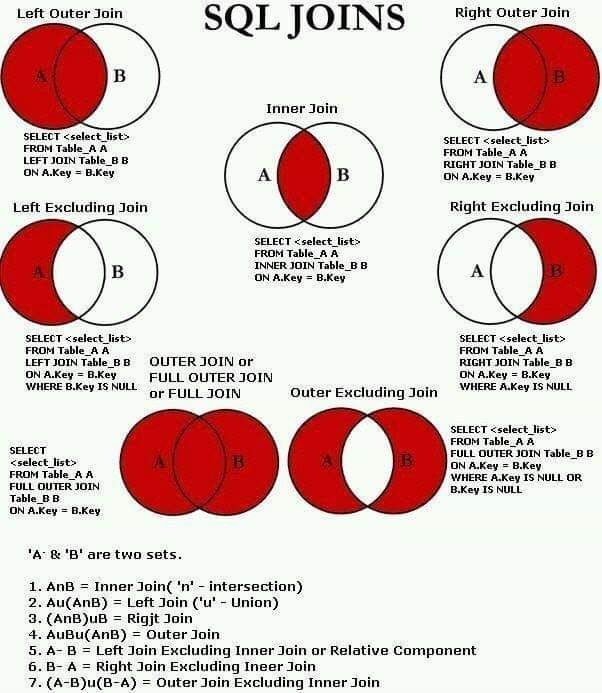

Use **.merge()** to join Pandas dataframes. You need to provide which columns to join on (left_on and right_on), and join type: inner (default), left (corresponds to LEFT OUTER in SQL), right (RIGHT OUTER), or outer (FULL OUTER).

In [ ]:
# #select airport_ident, type, description, 
# frequency_mhz from airport_freq join airports 
# on airport_freq.airport_ref = airports.id where airports.ident = 'KLAX'

airport_freq.merge(airports[airports.ident == 'KLAX'][['id']], 
                   left_on='airport_ref', right_on='id', 
                   how='inner')[['airport_ident', 'type', 
                                 'description', 'frequency_mhz']]

,airport_ident,type,description,frequency_mhz
0,KLAX,APP,SOCAL APP,36.07
1,KLAX,APP,SOCAL APP,124.30
2,KLAX,ATIS,ATIS,133.80
3,KLAX,CLD,CLNC DEL,121.40
4,KLAX,DEP,SOCAL DEP,124.30
5,KLAX,GND,GND,121.65
6,KLAX,MISC,CG,34.50
7,KLAX,MISC,CG,898.40
8,KLAX,OPS,AF,37.22
9,KLAX,TWR,TWR,119.80


UNION
The UNION command combines the result set of two or more SELECT statements (only distinct values)


The UNION ALL command combines the result set of two or more SELECT statements (allows duplicate values).



In [ ]:
#Use pd.concat() to UNION ALL two dataframes:
#select name, municipality from airports 
#where ident = 'KLAX' union all select name, municipality from airports where ident = 'KLGB'


pd.concat([airports[airports.ident == 'KLAX'][['name', 'municipality']], 
           airports[airports.ident == 'KLGB'][['name', 'municipality']]])

,name,municipality
28940,Los Angeles International Airport,Los Angeles
28965,Long Beach /Daugherty Field/ Airport,Long Beach


INSERT

There’s no such thing as an INSERT in Pandas. Instead, you would create a new dataframe containing new records, and then concat the two:

|                         SQL                        |                                    Pandas                                   |
|:--------------------------------------------------:|:---------------------------------------------------------------------------:|
| create table heroes (id integer, name text);       | df1 = pd.DataFrame({'id': [1, 2], 'name': ['Harry Potter', 'Ron Weasley']}) |
| insert into heroes values (1, 'Harry Potter');     | df2 = pd.DataFrame({'id': [3], 'name': ['Hermione Granger']})               |
| insert into heroes values (2, 'Ron Weasley');      |                                                                             |
| insert into heroes values (3, 'Hermione Granger'); | pd.concat([df1, df2]).reset_index(drop=True)                                |

In [ ]:
df1 = pd.DataFrame({'id': [1, 2], 'name': ['Harry Potter', 'Ron Weasley']})
df2 = pd.DataFrame({'id': [3], 'name': ['Hermione Granger']})
pd.concat([df1, df2]).reset_index(drop=True)

,id,name
0,1,Harry Potter
1,2,Ron Weasley
2,3,Hermione Granger


UPDATE

In [ ]:
airports.loc[airports['ident'] == 'KLAX', 'home_link'] = 'http://www.lawa.org/welcomelax.aspx'

DROP in PANDA

In [ ]:
lax_freq = lax_freq[lax_freq.type != 'MISC']
lax_freq.drop(lax_freq[lax_freq.type == 'MISC'].index)

NameError: ignored